## **CNN**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
!pip install umap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from zipfile import ZipFile
file_name = "/content/archivee.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
os.listdir('/content/brain_tumor_dataset')


['no', 'yes']

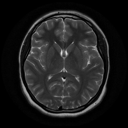

In [ ]:
im =Image.open('/content/brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

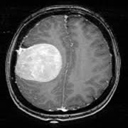

In [ ]:
im =Image.open('/content/brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im

In [ ]:
yes=os.listdir('/content/brain_tumor_dataset/yes')
no=os.listdir('/content/brain_tumor_dataset/no')

In [ ]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [ ]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [ ]:
len(data_target)==len(data)

True

In [ ]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
data

array(['Y49.JPG', 'Y116.JPG', 'Y153.jpg', 'Y168.jpg', 'Y161.JPG',
       'Y66.JPG', 'Y58.JPG', 'Y62.jpg', 'Y106.jpg', 'Y86.JPG', 'Y56.jpg',
       'Y15.jpg', 'Y44.JPG', 'Y18.JPG', 'Y34.jpg', 'Y182.JPG', 'Y24.jpg',
       'Y102.jpg', 'Y33.jpg', 'Y29.jpg', 'Y19.JPG', 'Y16.JPG', 'Y75.JPG',
       'Y51.jpg', 'Y8.jpg', 'Y9.jpg', 'Y117.JPG', 'Y26.jpg', 'Y46.jpg',
       'Y59.JPG', 'Y77.jpg', 'Y42.jpg', 'Y92.png', 'Y187.jpg', 'Y53.jpg',
       'Y41.jpg', 'Y25.jpg', 'Y40.JPG', 'Y258.JPG', 'Y67.JPG', 'Y55.jpg',
       'Y96.jpg', 'Y184.JPG', 'Y28.jpg', 'Y163.JPG', 'Y167.JPG',
       'Y183.jpg', 'Y100.JPG', 'Y97.JPG', 'Y30.jpg', 'Y37.jpg', 'Y65.JPG',
       'Y45.JPG', 'Y7.jpg', 'Y90.jpg', 'Y27.jpg', 'Y114.JPG', 'Y21.jpg',
       'Y31.jpg', 'Y169.jpg', 'Y38.jpg', 'Y47.JPG', 'Y247.JPG', 'Y76.jpg',
       'Y251.JPG', 'Y4.jpg', 'Y60.jpg', 'Y252.jpg', 'Y107.jpg',
       'Y103.jpg', 'Y188.jpg', 'Y91.jpg', 'Y6.jpg', 'Y81.jpg', 'Y23.JPG',
       'Y12.jpg', 'Y3.jpg', 'Y14.jpg', 'Y32.jpg', 'Y120.JPG', 'Y18

In [ ]:
yes_values=os.listdir('/content/brain_tumor_dataset/yes')
no_values=os.listdir('/content/brain_tumor_dataset/no')

In [ ]:
X_data =[]
for file in yes_values:
    #face = misc.imread('/content/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
#X_data =[]
for file in no_values:
    #face = misc.imread('/content/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
len(X_data)==len(data)==len(data_target)

True

In [ ]:
X = np.squeeze(X_data)

In [ ]:
X.shape

(253, 32, 32, 3)

In [ ]:
# normalize data
X = X.astype('float32')
X /= 255

In [ ]:
#categorical_labels = to_categorical(data_target, num_classes=2)


In [ ]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [ ]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - 0s 71ms/step - loss: 0.3297 - accuracy: 0.8789 - val_loss: 0.9949 - val_accuracy: 0.5079
Epoch 2/150
2/2 [==============================] - 0s 37ms/step - loss: 0.3320 - accuracy: 0.8789 - val_loss: 1.0650 - val_accuracy: 0.4286
Epoch 3/150
2/2 [==============================] - 0s 32ms/step - loss: 0.3145 - accuracy: 0.8842 - val_loss: 1.2428 - val_accuracy: 0.2857
Epoch 4/150
2/2 [==============================] - 0s 53ms/step - loss: 0.3002 - accuracy: 0.8947 - val_loss: 1.4531 - val_accuracy: 0.2857
Epoch 5/150
2/2 [==============================] - 0s 36ms/step - loss: 0.3027 - accuracy: 0.8895 - val_loss: 1.5738 - val_accuracy: 0.2698
Epoch 6/150
2/2 [==============================] - 0s 34ms/step - loss: 0.3032 - accuracy: 0.8842 - val_loss: 1.5189 - val_accuracy: 0.2857
Epoch 7/150
2/2 [==============================] - 0s 34ms/step - loss: 0.2917 - accuracy: 0.8947 - val_loss: 1.3422 - val_accuracy: 0.2857
Epoch 8/150
2/2 [===

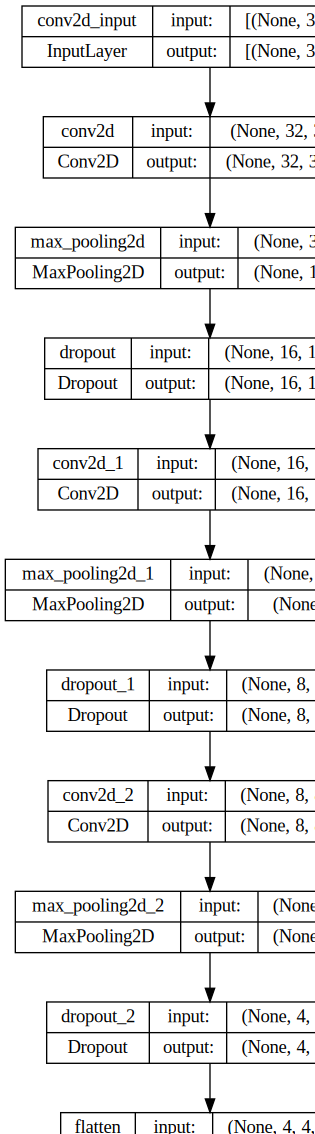

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6190476417541504


In [ ]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

2/2 [==============================] - 0s 41ms/step


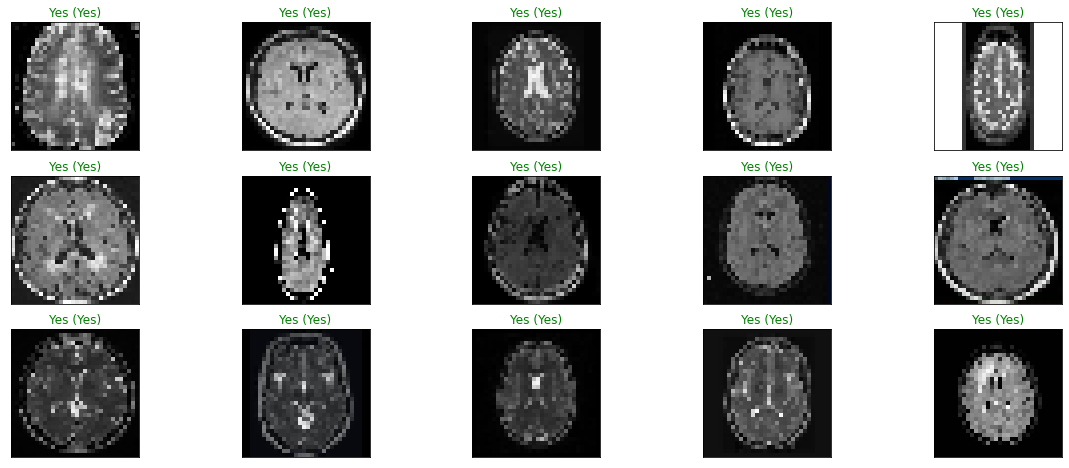

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## **ANN**

In [ ]:
from tensorflow import keras

In [ ]:
#adding hidden layers
model = keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),
                keras.layers.Dense(128,activation = tf.nn.sigmoid),                          
                keras.layers.Dense(10,activation = tf.nn.softmax)])
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [ ]:
model.fit(x_train, y_train,epochs = 5)

Epoch 1/5
6/6 [==============================] - 0s 7ms/step - loss: 0.8235 - accuracy: 0.8158
Epoch 2/5
6/6 [==============================] - 0s 6ms/step - loss: 0.4205 - accuracy: 0.8368
Epoch 3/5
6/6 [==============================] - 0s 6ms/step - loss: 0.3886 - accuracy: 0.8474
Epoch 4/5
6/6 [==============================] - 0s 6ms/step - loss: 0.3767 - accuracy: 0.8316
Epoch 5/5
6/6 [==============================] - 0s 6ms/step - loss: 0.3275 - accuracy: 0.8737


In [ ]:
model.evaluate(x_train,y_train)

6/6 [==============================] - 0s 3ms/step - loss: 0.3307 - accuracy: 0.8842


[0.3306528329849243, 0.8842105269432068]

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               393344    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________
